## filtry FIR metodą okien

In [1]:
import scipy

In [44]:
from scipy import signal
import numpy as np
from math import sin, pi
import matplotlib.pyplot as plt

def filter(filtr, fs, fc, M, window):
    f = (fc/fs)/2
    N = 2*M+1
    hw = np.zeros(N)
    
    if filtr == 1:
        m1 = np.linspace(-M, -1, M)
        x1 = np.zeros(len(m1))
        for i in range(len(m1)):
            x1[i] = sin(2*pi*f*m1[i])/(pi*m1[i])
            
        m2 = 0
        x2 = 2*f
            
        m3 = np.linspace(1, M, M)
        x3 = np.zeros(len(m3))
        for i in range(len(m3)):
            x3[i] = sin(2*pi*f*m3[i])/(pi*m3[i])
            
        time = np.hstack((m1, m2, m3))
        x = np.hstack((x1, x2, x3))
        
    else:
        m1 = np.linspace(-M, -1, M)
        x1 = np.zeros(len(m1))
        for i in range(len(m1)):
            x1[i] = -sin(2*pi*f*m1[i])/(pi*m1[i])
            
        m2 = 0
        x2 = -2*f
            
        m3 = np.linspace(1, M, M)
        x3 = np.zeros(len(m3))
        for i in range(len(m3)):
            x3[i] = -sin(2*pi*f*m3[i])/(pi*m3[i])
            
        time = np.hstack((m1, m2, m3))
        x = np.hstack((x1, x2, x3))
        
        
    if window == 'triang': 
        w  = scipy.signal.triang(N)
        for i in range(len(w)):
            hw[i] = w[i] * x[i]
            

    elif window == 'barlett':
        w  = scipy.signal.bartlett(N)
        
        for i in range(len(w)):
            hw[i] = w[i] * x[i]

        
    elif window == 'hamming':
        w  = scipy.signal.hamming(N)
        
        for i in range(len(w)):
            hw[i] = w[i] * x[i]

        
    else:
        w  = scipy.signal.blackman(N)
        
        for i in range(len(w)):
            hw[i] = w[i] * x[i]
            
    return hw
    


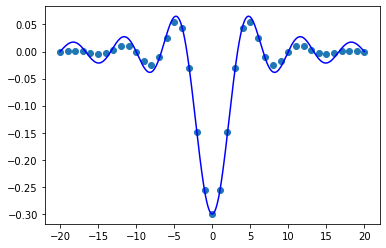

In [3]:
#parametry
filt = 2
fc = 30
fs = 100
M = 20
window = 'hamming'


y = filter(filt, fs, fc, 20, window)
x = np.linspace(-20, 20, len(y))    

#idealny
x2 = np.linspace(-20, 20, 10000)
y2 = np.zeros(len(x2))

if filt == 1:
    for i in range(len(x2)):
        f = (30/100)/2
        if x2[i] == 0:
            y2[i] = 2*f

        else:
            y2[i] = sin(2*pi*f*x2[i])/(pi*x2[i])
        
else:
    for i in range(len(x2)):
        f = (30/100)/2
        if x2[i] == 0:
            y2[i] = 1- 2*f

        else:
            y2[i] = -sin(2*pi*f*x2[i])/(pi*x2[i])
    
    
plt.plot(x, y, 'o', x2, y2, 'b-')


In [4]:
def myfilter(signal, h):
    #signal - sygnal
    #h - wspolczynnik filtra
    
    K = len(signal)
    N = len(h)
    P = N - 1
    
    L = K + P
    

    signal_prim = np.zeros(L)
    signal_prim[N-1::] = signal
    signal_prim[0:P] = np.tile(signal[1], (1, P))

    signal_filtered = np.zeros(L)

    for k in range(N-1,L):
        for m in range(N):
            signal_filtered[k] = signal_filtered[k] + h[m] * signal_prim[k-m]
    
    Signal_filtered = signal_filtered[N-1::]
    print('s1 = ', signal_filtered[N-1:N+4])
    print('s2 = ', Signal_filtered[0:5])
    return Signal_filtered

In [5]:
# ładowanie danych

from mat4py import loadmat

data = loadmat('ECG100.mat')
ECG_signal = data.get('ECG100')


In [6]:
ECG = [item for sublist in ECG_signal for item in sublist]

print(ECG[0:10])

[-0.145, -0.145, -0.145, -0.145, -0.145, -0.145, -0.145, -0.145, -0.12, -0.135]


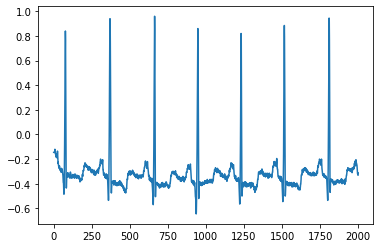

In [7]:
plt.plot(ECG_signal[0:2000])

In [8]:
type(ECG)
np.shape(ECG)

(650000,)

In [100]:
fs = 360
fc_low = 60
fc_high = 50
window = 'barlett'

f1 = (fc_high/fs)/2
f2 = (fc_low/fs)/2

#h_low  = filter(1,360, 60, 50, window)
#h_high = filter(2,360,5,200, window)


signal = ECG[0:10000]
h = scipy.signal.firwin(41, [f1, f2], window='hamming')

x2 = np.linspace(0, len(signal), len(signal))

#signal1 = myfilter(signal, h_high)
#signal2 = myfilter(signal1, h_low)

signal1 = myfilter(signal, h)

s1 =  [-0.145 -0.145 -0.145 -0.145 -0.145]
s2 =  [-0.145 -0.145 -0.145 -0.145 -0.145]


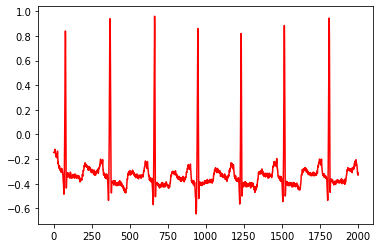

In [101]:
# surowy sygnał
plt.plot(x2[0:2000], signal[0:2000], 'r')

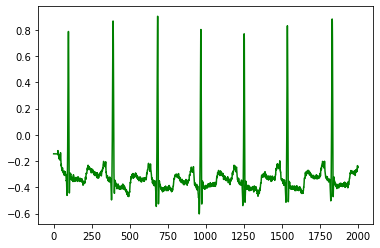

In [102]:
# po górno
plt.plot(x2[0:2000], signal1[0:2000], 'g')

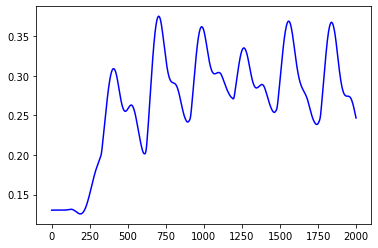

In [99]:
#po dolno
plt.plot(x2[0:2000],signal2[0:2000], 'b')

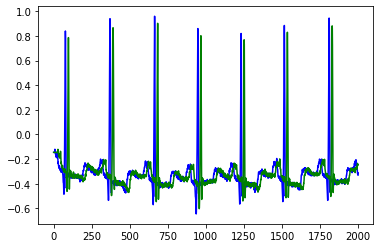

In [108]:
plt.plot(x2[0:2000], signal[0:2000], 'b', x2[0:2000], signal1[0:2000], 'g')



In [45]:
a = [1, 2, 3, 5, 1, 5,1]
b = [1, 1, 1 ]

K = len(a)
N = len(b)
P = N - 1

L = K + P

s = np.zeros(L)
s[N-1::] = a

print(s)

[0. 0. 1. 2. 3. 5. 1. 5. 1.]


In [16]:
print((30/100)/2)

0.15


In [17]:
for i in range(5):
    print (i)

0
1
2
3
4
